In [1]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 10.1MB/s]


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
import pandas as pd
df = pd.read_csv('ads.csv')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Data Profiling and Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()/len(df)

Unnamed: 0    0.0
TV            0.0
radio         0.0
newspaper     0.0
sales         0.0
dtype: float64

### All of the columns are numeric and there are 200 rows of data and it consists of no null values

There is no major use of teh Unnamed: 0 column so for now dropping would be better.

In [7]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


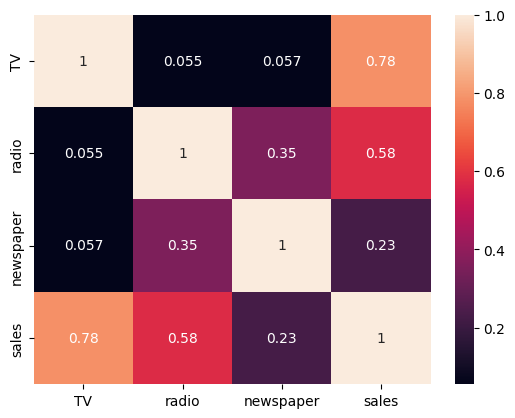

In [10]:
sns.heatmap(df.corr(),annot = True);

# TV ads have high correlation with sales and we take this as the single feature for single regression.

# EDA

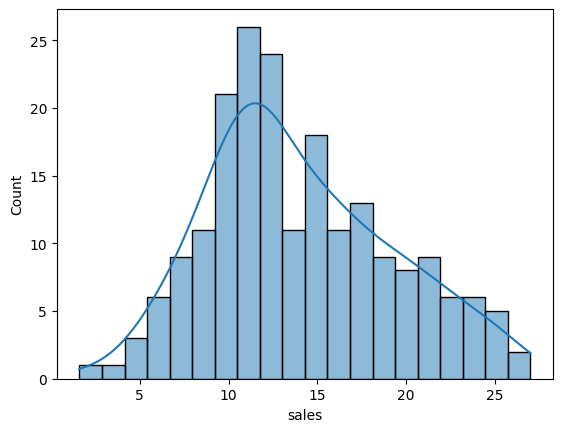

In [11]:
sns.histplot(data = df, bins = 20,x = 'sales', kde = True);

In [12]:
fig = px.histogram(df, x = 'TV',marginal = 'box')
fig.update_layout(bargap = 0.1)

In [13]:
px.box(df)

All of the columns have no outliers with newspaper as an exception.

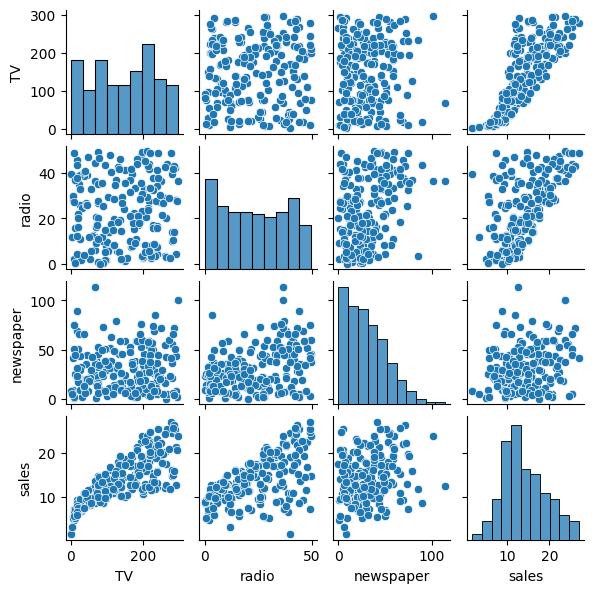

In [14]:
sns.pairplot(df,height = 1.5);

# Identifying Features and label

In [15]:
X = df.loc[:,['TV']]
y = df.sales

# Train Test Split data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
X_train.shape, y_train.shape

((160, 1), (160,))

In [18]:
X_test.shape, y_test.shape

((40, 1), (40,))

# Linear Regression Model (Single)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Mean squared error = {round(mse, 2)}")
print(f"Mean absolute error = {round(mae, 2)}")
print(f"r2_score = {round(r2, 3)}")

Mean squared error = 10.2
Mean absolute error = 2.44
r2_score = 0.677


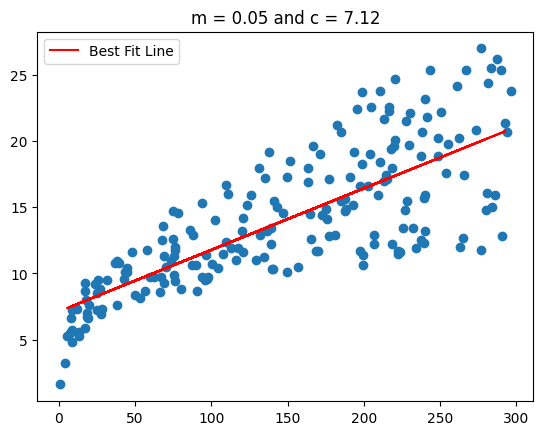

In [22]:
plt.scatter( x = df.TV, y = df.sales)
plt.plot(X_test, y_pred,color = 'red', label = 'Best Fit Line')
plt.title(f"m = {round(model.coef_[0], 2)} and c = {round(model.intercept_, 2)}")
plt.legend()
plt.show()

# Multiple Linear Regression

# Identifying Features and label

In [23]:
X = df.iloc[:,:-1]
y = df.sales

# Train Test Split data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
X_train.shape, y_train.shape

((160, 3), (160,))

In [26]:
X_test.shape, y_test.shape

((40, 3), (40,))

# Multiple Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluation

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"Mean squared error = {round(mse, 2)}")
print(f"Mean absolute error = {round(mae, 2)}")
print(f"r2_score = {round(r2, 5)}")

Mean squared error = 3.17
Mean absolute error = 1.46
r2_score = 0.89944


### Linear Regression has a r2 score of 0.899

# Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 4)}")

r2_score = 0.9004


### Lasso Regression has a r2 score of 0.9004

# Streamlit Labs

In [31]:
import pickle
with open('ad_sales.pickle','wb') as file:
    pickle.dump(model,file)

# Ridge Regression

In [32]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 4)}")

r2_score = 0.8994


### Ridge Regression has a r2 score of 0.8994

# ElasticNet

In [33]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 5)}")

r2_score = 0.89996


### ElasticNet has a r2 score of 0.89996

# Decision Tree

# Hyperparameter Tuning

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth' : [2,4, 6, 8],
    'max_features':['sqrt', 'log2'],
    'random_state': [10, 20, 30, 40]
}
model = DecisionTreeRegressor()
clf = GridSearchCV(model, param_grid = param_grid, cv = 5)

In [36]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [10, 20, 30, 40]})

In [37]:
be = clf.best_estimator_
be

DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features='sqrt',
                      random_state=40)

In [38]:
be.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features='sqrt',
                      random_state=40)

In [39]:
y_pred = be.predict(X_test)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"r2_score = {round(r2, 5)}")

r2_score = 0.83337


### Even with Hyperparamter tuning Decision Tree Regressor has a r2 score of 0.83337

# As Lasso Regression has the best r2_score so we conclude for this dataset this is the best algorithm and also use this regression algorithm to formulate a streamlit app to predict Ad Sales using TV, radio and newspaper value.